In [20]:
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datasets import load_dataset, Dataset
import pandas as pd
import torch
import os
import re
import matplotlib.pyplot as plt

In [39]:
df_clustered = pd.read_csv("../dataset/cluster_4_prompt_3.csv")

In [40]:
df_clustered.head()

,file_hash,file,error_message,error_description,error,error_msg_clean,cluster,decompiled_file_name,raw_file_name,d_lookup_vs_decompiled,d_lookup_vs_repaired,d_lookup_vs_repaired_new,syntactic_drift
0,0253cf135a521e0fc84fa527b09e38ddd53ab7e895a455...,decompiled_qupath_reader.cpython-312.py,"unexpected indent (line 56, col 16)","File ""/home/diogenes/pylingual_colaboration/py...",unexpected indent (decompiled_qupath_reader.cp...,unexpected indent,cluster_4,decompiled_qupath_reader.cpython-312.py,qupath_reader.py,284.0,276.0,223.185752,-21.413468
1,00ef84723bf152924c9e2c63d7899bddf958556d0a0583...,decompiled_jira.cpython-312.py,"unexpected indent (line 70, col 12)","File ""/home/diogenes/pylingual_colaboration/py...",unexpected indent (decompiled_jira.cpython-312...,unexpected indent,cluster_4,decompiled_jira.cpython-312.py,jira.py,111.0,114.0,96.509480,-13.054522
2,0252292835794a65dc77d88941e4a7ea2ae508c13a0c16...,decompiled_MusicHelper.cpython-312.py,"unexpected indent (line 26, col 16)","File ""/home/diogenes/pylingual_colaboration/py...",unexpected indent (decompiled_MusicHelper.cpyt...,unexpected indent,cluster_4,decompiled_MusicHelper.cpython-312.py,MusicHelper.py,318.0,671.0,551.437320,73.407962
3,022d1ab7c3a4d7bb7791101cde3b8eb7acb7e8241c26df...,decompiled_wiliot_tester_tag_test.cpython-312.py,"unexpected indent (line 105, col 20)","File ""/home/diogenes/pylingual_colaboration/py...",unexpected indent (decompiled_wiliot_tester_ta...,unexpected indent,cluster_4,decompiled_wiliot_tester_tag_test.cpython-312.py,wiliot_tester_tag_test.py,1520.0,1566.0,1359.045215,-10.589131
4,0240df9bddd21bf2aa1c5eaf5ef52097eaabf4c4833f4a...,decompiled_audio_utils.cpython-312.py,"unexpected indent (line 72, col 20)","File ""/home/diogenes/pylingual_colaboration/py...",unexpected indent (decompiled_audio_utils.cpyt...,unexpected indent,cluster_4,decompiled_audio_utils.cpython-312.py,audio_utils.py,120.0,252.0,197.346912,64.455760


In [41]:
cluster_stats = (
    df_clustered
    .groupby("cluster")["syntactic_drift"]
    .agg(["count", "mean", "std"])
    .reset_index()
)

print(cluster_stats)


     cluster  count       mean         std
0  cluster_4     89  83.090905  521.213076


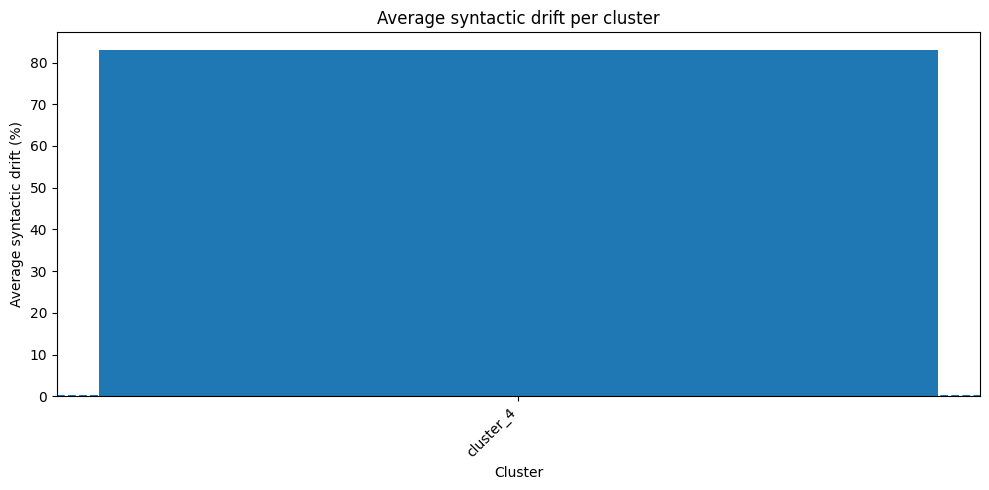

In [42]:
# (Optional) sort clusters by name
cluster_stats = cluster_stats.sort_values("cluster")

plt.figure(figsize=(10, 5))
plt.bar(cluster_stats["cluster"], cluster_stats["mean"])
plt.axhline(0, linestyle="--")  # show zero line for reference
plt.xlabel("Cluster")
plt.ylabel("Average syntactic drift (%)")
plt.title("Average syntactic drift per cluster")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

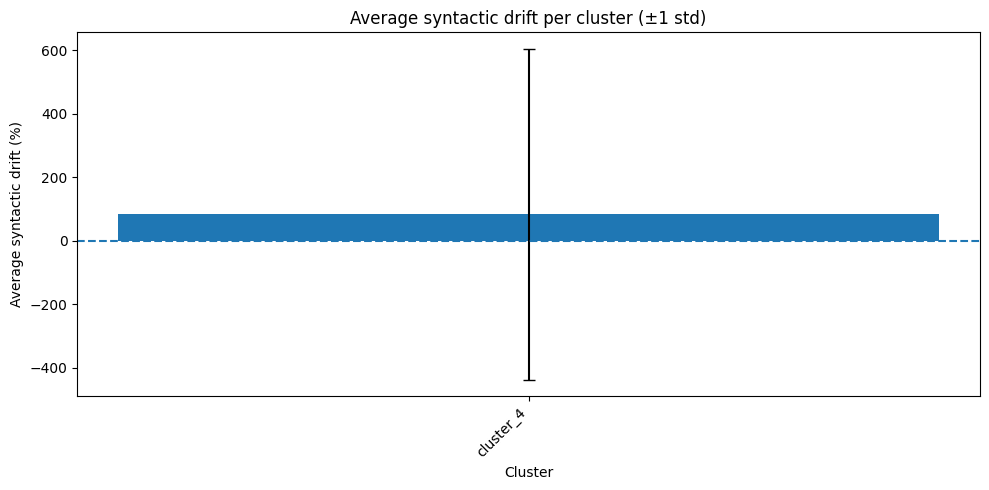

In [43]:
plt.figure(figsize=(10, 5))
plt.bar(
    cluster_stats["cluster"],
    cluster_stats["mean"],
    yerr=cluster_stats["std"],
    capsize=4,
)
plt.axhline(0, linestyle="--")
plt.xlabel("Cluster")
plt.ylabel("Average syntactic drift (%)")
plt.title("Average syntactic drift per cluster (±1 std)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


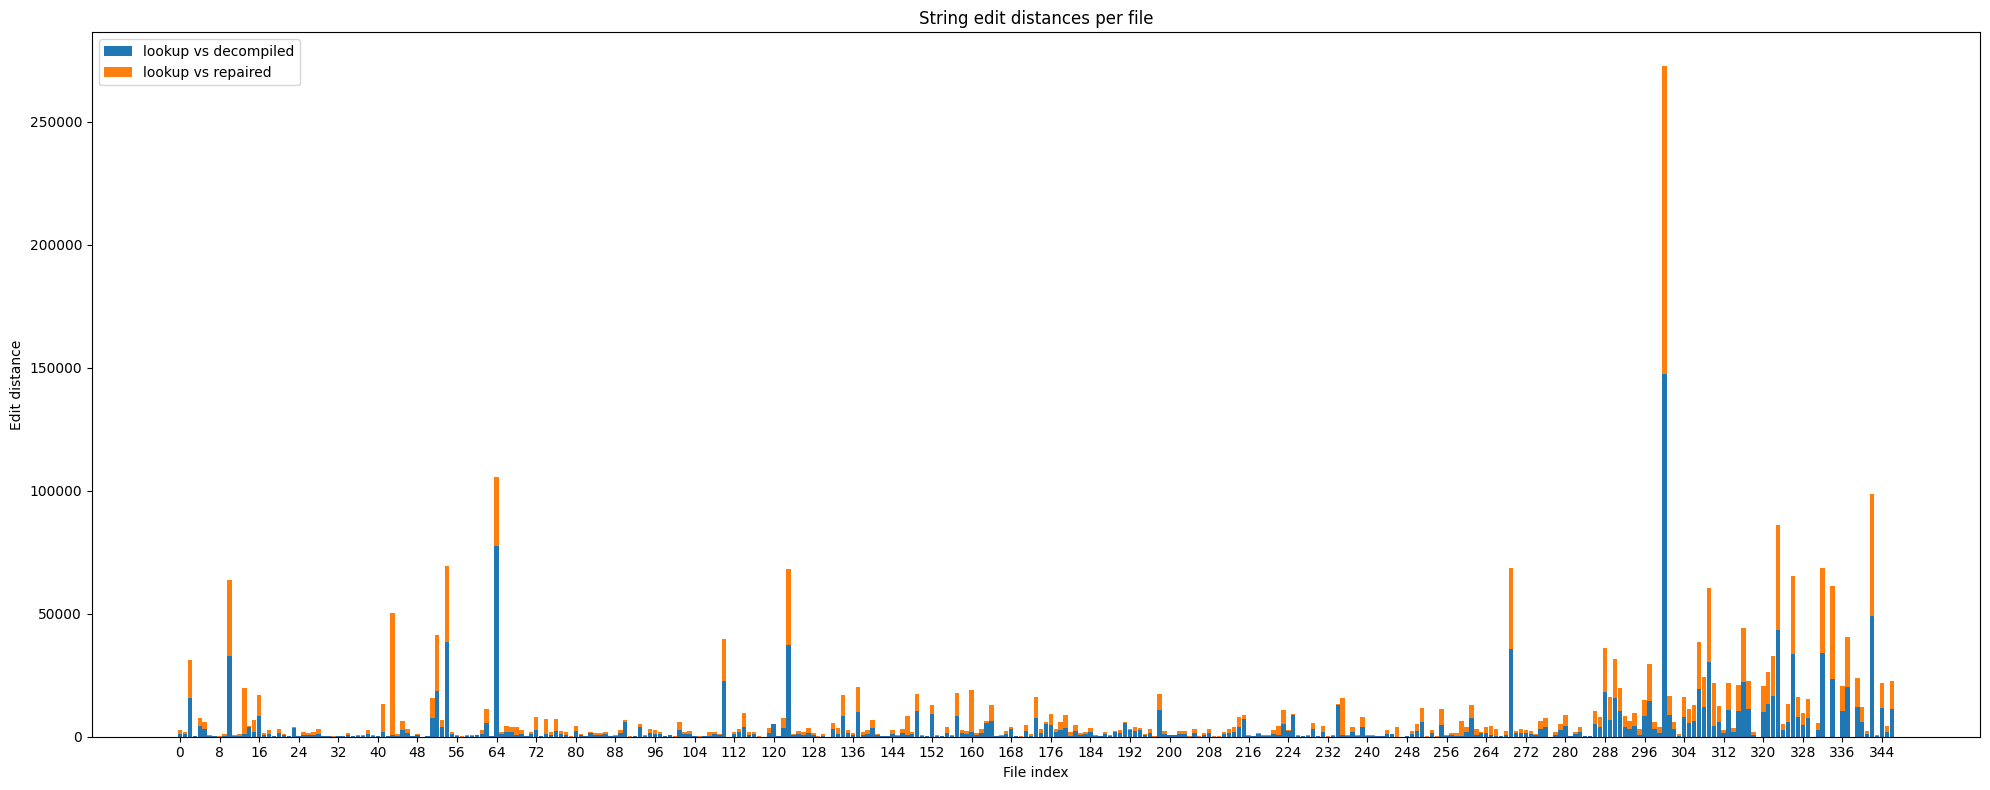

In [7]:
import matplotlib.pyplot as plt

# Prepare data
df_plot = df_clustered.reset_index(drop=True)

x = df_plot.index  # file index on x-axis
d_dec = df_plot["d_lookup_vs_decompiled"]
d_rep = df_plot["d_lookup_vs_repaired"]

plt.figure(figsize=(20, 8))  # wider & taller

bar_width = 0.9  # make bars wider (max is ~1.0 for touching bars)

# bottom stack: distance to decompiled
plt.bar(x, d_dec, width=bar_width, label="lookup vs decompiled")

# top stack: distance to repaired, stacked on top
plt.bar(x, d_rep, width=bar_width, bottom=d_dec, label="lookup vs repaired")

plt.xlabel("File index")
plt.ylabel("Edit distance")
plt.title("String edit distances per file")
plt.legend()

# Make x-axis readable (e.g., show every Nth tick)
if len(x) > 40:
    step = max(1, len(x) // 40)
    plt.xticks(range(0, len(x), step))
else:
    plt.xticks(x)

plt.tight_layout()
plt.show()


In [9]:
df_cluster_4 = df_clustered[df_clustered["cluster"] == "cluster_4"]

In [11]:
df_cluster_4.to_csv("../dataset/cluster_4_syntax_errors.csv", index=False)